<a href="https://colab.research.google.com/github/eunineelizze/ElizzeAP155/blob/master/Arzaga__AP155_Lab_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP155 Lab Assignment**
## Module 2: Solution of Linear and Nonlinear Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: **Eunine Elizze J. Arzaga**\
_Student No._: **2021-10771**\
_Section_: **TX-1**

### Submission Information

_Date and Time Submitted (most recent upload)_: 15 October 2023 (14:15)

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** Eunine ELizze J. Arzaga

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - 25/30
* Problem 2 - 15/30
* Problem 3 - 20/40



### PROBLEM 1

**Solve for eigenvalues and eigenvectors of a symmetric matrix**

1. Use numpy's $\tt linalg$ package to find the eigenvalues and eigenvectors of the ff. symmetrix matrix *(15 pts.)*:

$ \begin{equation}
{\bf A} =
\begin{pmatrix}
8 & -2 & -20 \\
-2 & -3 & -9 \\
-20 & -9 & -3
\end{pmatrix} \end{equation} $

2. Check your answer numerically; that is, check that $\bf AV = VD$, where the $N$ x $N$ matrix $\bf V$ has the eigenvectors as its columns and $\bf D$ is the diagonal matrix with the eigenvalues $\lambda_i$ as its diagonal entries. *(15 pts.)*

In [14]:
import numpy as np

# Defining the symmetric matrix A
A = np.array([[8, -2, -20],
              [-2, -3, -9],
              [-20, -9, -3]])

# Using numpy.linalg.eig, we compute the eigenvalue and eigenvector of matrix A
eigenvalues, eigenvectors = np.linalg.eig(A)

# Eigenvalues
print("Eigenvalues (x):")
for i, eigval in enumerate(eigenvalues):
    print(f"x{i+1} = {eigval:.6f}")

# Eigenvectors
print("\nEigenvectors (V):")
for i, eigvec in enumerate(eigenvectors.T):
    print(f"V{i+1} = {eigvec}")

Eigenvalues (x):
x1 = -21.996062
x2 = 23.835847
x3 = 0.160215

Eigenvectors (V):
V1 = [0.52496527 0.40892672 0.74645187]
V2 = [ 0.76748685  0.15169114 -0.62285932]
V3 = [ 0.36793396 -0.89987151  0.2342133 ]


In [17]:
# Checking that AV = VD using Matrix Multiplication
AV = np.dot(A, eigenvectors) # np.dot multiplies matrix A to the eigenvector
VD = np.dot(eigenvectors, np.diag(eigenvalues)) # np.diag creates a matrix with eigenvalues as the diagonals

print("Matrix AV")
print(AV)

print("\nMatrix VD")
print(VD)

# Printing result
if np.allclose(AV, VD):
    print("\nTherefore, AV = VD.")
else:
    print("\nWoops! AV ≠ VD.")

Matrix AV
[[-11.54716868  18.29369893   0.05894862]
 [ -8.99477756   3.61568676  -0.14417311]
 [-16.4190016  -14.8463793    0.03752454]]

Matrix VD
[[-11.54716868  18.29369893   0.05894862]
 [ -8.99477756   3.61568676  -0.14417311]
 [-16.4190016  -14.8463793    0.03752454]]

Therefore, AV = VD.


**Analysis:**
* Since $A$ is symmetric, then it has real eigenvalues and its eigenvectors are orthogonal.
* Matrix $A$ is diagonalizable. That is, $A=VDV^1$.




### PROBLEM 2

**Solve a nonlinear equation using the relaxation method**

Consider the equation $x=1- e^{-cx}$, where $c$ is a known parameter and $x$ is unknown. This equation arises in a variety of situations, including the physics of contact processes, mathematical models of epidemics, and the theory of random graphs.

1. Write a program to solve this equation for $x$ using the relaxation method for the case $c = 2$. Calculate your solution to an accuracy of at least $10^{-6}$. *(10 pts.)*

2. Modify your program to calculate the solution for values of $c$ from 0 to 3 in steps of 0.01. *(10 pts.)*

3. Make a plot of $x$ as a function of $c$. Describe the different regimes that you see. *(10 pts.)*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

# Function for relaxation method to solve for x in x = 1 - e^(-cx)
def relaxation(c, accuracy=1e-6, max_iterations=1000):
    x = 0.5  # Initial guess for x
    for i in range(max_iterations): # Running 1000 times (just to be sure)
        x_new = 1 - np.exp(-c * x)
        if abs(x_new - x) < accuracy:  # Checking for convergence
            return x_new
        x = x_new
    raise ValueError("Solution did not converge")

# Solve for c = 2
c = 2
solution = relaxation(c)
print(f"Solution for c = {c}: x = {solution:.6f}")


Solution for c = 2: x = 0.796812


In [ ]:
# Calculate the solution for values of c from 0 to 3 in steps of 0.01
c_values = np.arange(0, 3.01, 0.01) # np.arrange(start, end, steps increment)
x_values = [] # Empty list that stores the solutions for x for each value of c

for c in c_values:
    try:
        x_values.append(relaxation(c))
    except ValueError: # Error handling
        x_values.append(np.nan)  # Appending NaN if the solution does not converge

# Printing all values
for i in range(0, len(c_values)):
    print(f"c = {c_values[i]:.2f}, x = {x_values[i]:.2f}")


c = 0.00, x = 0.00
c = 0.01, x = 0.00
c = 0.02, x = 0.00
c = 0.03, x = 0.00
c = 0.04, x = 0.00
c = 0.05, x = 0.00
c = 0.06, x = 0.00
c = 0.07, x = 0.00
c = 0.08, x = 0.00
c = 0.09, x = 0.00
c = 0.10, x = 0.00
c = 0.11, x = 0.00
c = 0.12, x = 0.00
c = 0.13, x = 0.00
c = 0.14, x = 0.00
c = 0.15, x = 0.00
c = 0.16, x = 0.00
c = 0.17, x = 0.00
c = 0.18, x = 0.00
c = 0.19, x = 0.00
c = 0.20, x = 0.00
c = 0.21, x = 0.00
c = 0.22, x = 0.00
c = 0.23, x = 0.00
c = 0.24, x = 0.00
c = 0.25, x = 0.00
c = 0.26, x = 0.00
c = 0.27, x = 0.00
c = 0.28, x = 0.00
c = 0.29, x = 0.00
c = 0.30, x = 0.00
c = 0.31, x = 0.00
c = 0.32, x = 0.00
c = 0.33, x = 0.00
c = 0.34, x = 0.00
c = 0.35, x = 0.00
c = 0.36, x = 0.00
c = 0.37, x = 0.00
c = 0.38, x = 0.00
c = 0.39, x = 0.00
c = 0.40, x = 0.00
c = 0.41, x = 0.00
c = 0.42, x = 0.00
c = 0.43, x = 0.00
c = 0.44, x = 0.00
c = 0.45, x = 0.00
c = 0.46, x = 0.00
c = 0.47, x = 0.00
c = 0.48, x = 0.00
c = 0.49, x = 0.00
c = 0.50, x = 0.00
c = 0.51, x = 0.00
c = 0.52, x 

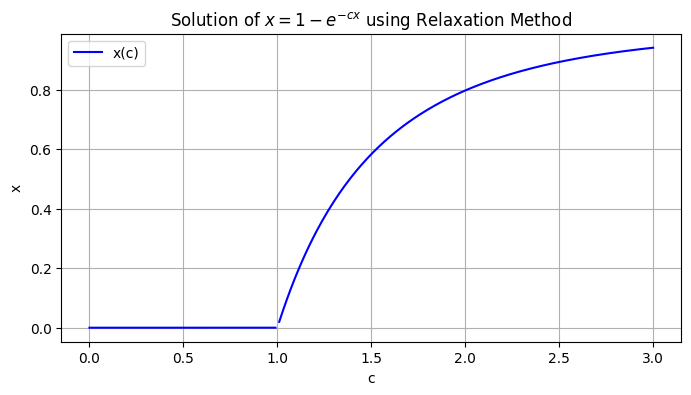

In [ ]:
# From the above result, we see that for c = 1.00, the relaxation method does not converge
# Hence, we expect to see a discontinuity in the plot

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(c_values, x_values, label="x(c)", color="b")
plt.xlabel("c")
plt.ylabel("x")
plt.title("Solution of $x = 1 - e^{-cx}$ using Relaxation Method")
plt.grid(True)
plt.legend()
plt.show()


Analysis:
* The function $x=1-e^{-cx}$ are smooth and continuous except at $x(c) =1$.
* The relaxation method does not always converge for all values of $c$.

### PROBLEM 3

**Physics Application: Calculating the Lagrange point**

_Refer to Exercise 6.16 of the Newman text._ The $L_1$ Lagrange point is the point between the Earth and the Moon at which a satellite will orbit the Earth in perfect synchrony with the Moon, staying always in between the two.

Assuming circular orbits, and assuming that the Earth is much more massive than either the Moon or the satellite, the distance $r$ from the center of the Earth to the $L_1$ point satisfies
$$ \begin{equation}
\frac{GM}{r^2} - \frac{Gm}{(R-r)^2} = \omega^2 r,
\end{equation} $$
where $R$ is the distance from the Earth to the Moon, $M$ and $m$ are the Earth and Moon masses, $G$ is Newton's gravitational constant, and $\omega$ is the angular velocity of both the Moon and the satellite.

Use Newton's method to solve for the distance r from the Earth to the $L_1$ point. Compute a solution accurate to at least four significant figures.

In [2]:
import numpy as np

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)
M = 5.972e24     # Mass of the Earth (kg)
m = 7.348e22     # Mass of the Moon (kg)
R = 3.844e8      # Distance from the Earth to the Moon (m)
omega = 2 * np.pi / T  # Angular velocity of the Moon, rad/s

# Function for the Lagrange point equation
def f(r):
    return (G * M / r**2) - (G * m / (R - r)**2) - (omega**2 * r)

# Derivative of the function f(r) -> f'(r)
def f_prime(r):
    return (-2 * G * M / r**3) - (2 * G * m / (R - r)**3) - omega**2

# Newton's method implementation
def newtons_method(r_init, tol=1e-10, max_iter=1000):
    r = r_init
    for _ in range(max_iter):
        f_r = f(r)
        f_prime_r = f_prime(r)
        r_new = r - f_r / f_prime_r
        if abs(r_new - r) < tol:
            return r_new
        r = r_new
    raise ValueError("Newton's method did not converge")

# Initial guess for r in meters (somewhere between Earth and Moon)
r_initial = 3.2e8

# Distance to the L1 point
r_L1 = newtons_method(r_initial)
print(f"Distance to L1 point: {r_L1:.5} meters")


NameError: name 'T' is not defined

### Physical Interpretation of the Result

The actual value of $ r $, the distance from the Earth to the Lagrange Point, $L_1$, is $3.2604×10^8$ meters. This is slightly less than the halfway point between the Earth and Moon which is $3.844×10^8$ meters.

Because the Earth is much more massive than the Moon and their barycenter (center of mass) is closer to Earth than to the Moon, the satellite also needs to be positioned closer to the Earth in order to experience an equal gravitational pull from both bodies, and to cancel the centrifugal force. Hence, $ r < \frac{R}{2} $.

From the values above, we see that $ r $ is around $ 0.84 $ times the Earth-Moon distance $ R $.



### Instructor's Comments

#### Problem 1
- No discussion for what np.allclose() does. If you check the documentation of this numpy function, there is actually a default threshold ($1 \times 10^{-8}$) which is used to check if the difference between the two matrices you are comparing are within that threshold. 

#### Problem 2
- Manually setting the max number of iterations in your loops for the relaxation method is problematic since this will limit the accuracy of your result. For example, for $c=1$, you should find that the solution will converge to $x=0.0014132112807466735$ after 1411 iterations. But since in your loop you only set the max iterations to 1000, your result is incorrect. Using a for loop in this case therefore does not guarantee convergence so a while loop would be better since we know exactly what the condition should be to stop the loop.
- Missing discussion of results:
> Describe the different regimes that you see.

#### Problem 3
- Code doesn't work, `T` is undefined.
- Your discussion is inconsistent with your results. As you mention, $r = 0.84*R$ so clearly, $r > \frac{R}{2}$. This means the location of $L_1$ is closer to the Moon than it is closer to the Earth.